<a href="https://colab.research.google.com/github/codewithdark-git/Transformers/blob/main/General_contextual_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


## **Word Embeddings**:

In [ ]:

def embedding(corpus):
    # Step 2: Preprocessing - Tokenize and Create Vocabulary
    words = set(word for sentence in corpus for word in sentence.split())
    words = list(words)
    print(words)
    vocab = {word: idx for idx, word in enumerate(words)}
    print(vocab)
    vocab_size = len(vocab)
    print(vocab_size)

    # Step 3: Create a Co-occurrence Matrix
    window_size = 3
    co_occurrence_matrix = np.zeros((vocab_size, vocab_size))

    for sentence in corpus:
        tokens = sentence.split()
        for i, word in enumerate(tokens):
            word_idx = vocab[word]
            # Define the context window
            start = max(i - window_size, 0)
            end = min(i + window_size + 1, len(tokens))
            for j in range(start, end):
                if i != j:  # Exclude the word itself
                    context_word_idx = vocab[tokens[j]]
                    co_occurrence_matrix[word_idx][context_word_idx] += 1

    # Normalize the co-occurrence matrix
    co_occurrence_matrix = co_occurrence_matrix / np.sum(co_occurrence_matrix, axis=1, keepdims=True)

    # Step 4: Dimensionality Reduction (SVD)
    U, S, Vt = np.linalg.svd(co_occurrence_matrix)
    embedding_dim = 2  # Choose the embedding dimension
    word_embeddings = U[:, :embedding_dim]

    # Display the embeddings
    print("\nWord Embeddings:")
    for word, idx in vocab.items():
        print(f"{word}: {word_embeddings[idx]}")

    word_embeddings = np.array(word_embeddings)
    return word_embeddings

In [ ]:
# Step 1: Sample Text Data
corpus = [
    "the river flows near the bank",
    "the bank manages money and grows investments",
    "money flows like a river through the economy",
    "a bank by the river is a calm place"
]

embedding = embedding(corpus)

['like', 'calm', 'place', 'bank', 'flows', 'through', 'economy', 'a', 'manages', 'money', 'near', 'grows', 'investments', 'by', 'the', 'river', 'and', 'is']
{'like': 0, 'calm': 1, 'place': 2, 'bank': 3, 'flows': 4, 'through': 5, 'economy': 6, 'a': 7, 'manages': 8, 'money': 9, 'near': 10, 'grows': 11, 'investments': 12, 'by': 13, 'the': 14, 'river': 15, 'and': 16, 'is': 17}
18

Word Embeddings:
like: [-0.23339497 -0.01719972]
calm: [-0.23410982  0.20496999]
place: [-0.18057877  0.19829694]
bank: [-0.24953142 -0.07063146]
flows: [-0.28790256  0.01024365]
through: [-0.26516374  0.12637865]
economy: [-0.33786985  0.12888122]
a: [-0.24065303  0.03267885]
manages: [-0.20625513 -0.36427062]
money: [-0.16827298 -0.16775229]
near: [-0.34160858  0.04087688]
grows: [-0.09493005 -0.45063864]
investments: [-0.11718647 -0.57172248]
by: [-0.30776311  0.12100772]
the: [-0.21104954  0.03166233]
river: [-0.22833733  0.06824012]
and: [-0.11413017 -0.38329692]
is: [-0.23633387  0.14128337]


## **Dot product similarity matrix**:

In [ ]:
import numpy as np

# Embeddings (as given)
embeddings = {
    "like": [-0.23339497, -0.01719972],
    "calm": [-0.23410982, 0.20496999],
    "place": [-0.18057877, 0.19829694],
    "bank": [-0.24953142, -0.07063146],
    "flows": [-0.28790256, 0.01024365],
    "through": [-0.26516374, 0.12637865],
    "economy": [-0.33786985, 0.12888122],
    "a": [-0.24065303, 0.03267885],
    "manages": [-0.20625513, -0.36427062],
    "money": [-0.16827298, -0.16775229],
    "near": [-0.34160858, 0.04087688],
    "grows": [-0.09493005, -0.45063864],
    "investments": [-0.11718647, -0.57172248],
    "by": [-0.30776311, 0.12100772],
    "the": [-0.21104954, 0.03166233],
    "river": [-0.22833733, 0.06824012],
    "and": [-0.11413017, -0.38329692],
    "is": [-0.23633387, 0.14128337]
}

# Convert embeddings dictionary to a matrix
words = list(embeddings.keys())
embedding_matrix = np.array(list(embeddings.values()))

# Compute the dot product similarity matrix
similarity_matrix = np.dot(embedding_matrix, embedding_matrix.T)

# Display the results
print("Dot Product Similarity Matrix:")
for i, word1 in enumerate(words):
    for j, word2 in enumerate(words):
        print(f"{word1} · {word2} = {similarity_matrix[i, j]:.4f}")
    print()


Dot Product Similarity Matrix:
like · like = 0.0548
like · calm = 0.0511
like · place = 0.0387
like · bank = 0.0595
like · flows = 0.0670
like · through = 0.0597
like · economy = 0.0766
like · a = 0.0556
like · manages = 0.0544
like · money = 0.0422
like · near = 0.0790
like · grows = 0.0299
like · investments = 0.0372
like · by = 0.0697
like · the = 0.0487
like · river = 0.0521
like · and = 0.0332
like · is = 0.0527

calm · like = 0.0511
calm · calm = 0.0968
calm · place = 0.0829
calm · bank = 0.0439
calm · flows = 0.0695
calm · through = 0.0880
calm · economy = 0.1055
calm · a = 0.0630
calm · manages = -0.0264
calm · money = 0.0050
calm · near = 0.0884
calm · grows = -0.0701
calm · investments = -0.0898
calm · by = 0.0969
calm · the = 0.0559
calm · river = 0.0674
calm · and = -0.0518
calm · is = 0.0843

place · like = 0.0387
place · calm = 0.0829
place · place = 0.0719
place · bank = 0.0311
place · flows = 0.0540
place · through = 0.0729
place · economy = 0.0866
place · a = 0.0499
pl

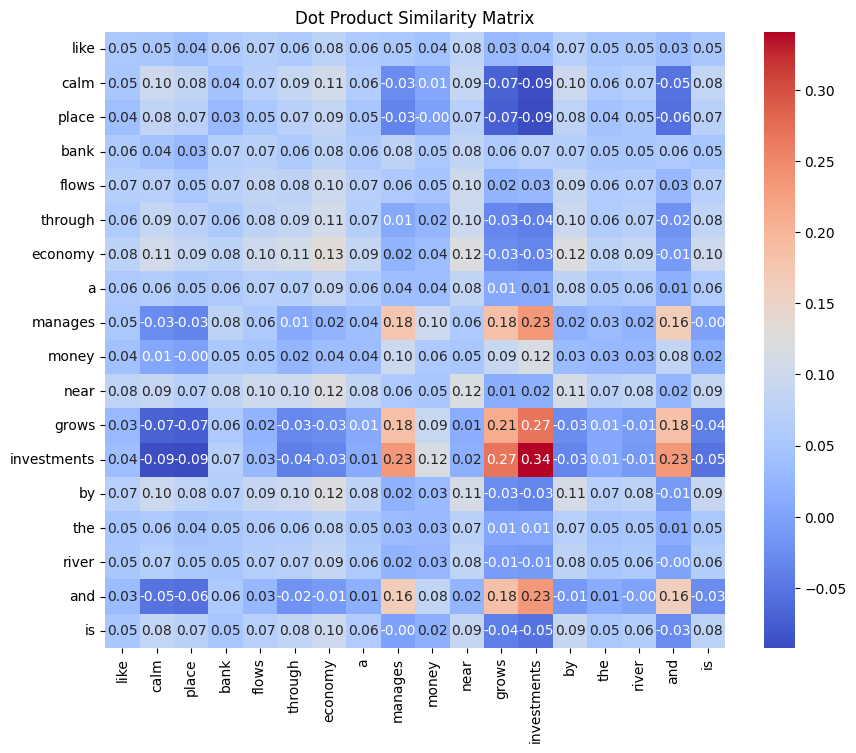

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=words, yticklabels=words, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Dot Product Similarity Matrix")
plt.show()


##  **Softmax**:

In [ ]:
def softmax(matrix):
    exp_matrix = np.exp(matrix)  # Exponentiate each element
    row_sums = np.sum(exp_matrix, axis=1, keepdims=True)  # Sum along rows
    return exp_matrix / row_sums  # Normalize rows to sum to 1

In [ ]:
x = softmax(similarity_matrix)

In [ ]:
x

array([[0.0556232 , 0.0554203 , 0.05473848, 0.05588442, 0.05630877,
        0.05589895, 0.05685316, 0.05566973, 0.05560292, 0.05492622,
        0.05698899, 0.05425735, 0.05465363, 0.05646271, 0.05528738,
        0.055476  , 0.05443794, 0.05550985],
       [0.05595149, 0.05856812, 0.05775966, 0.05555152, 0.05698972,
        0.05805273, 0.05907961, 0.05662258, 0.0517794 , 0.05343044,
        0.05807428, 0.04956214, 0.04859978, 0.05857007, 0.0562198 ,
        0.0568726 , 0.05047737, 0.05783866],
       [0.05592891, 0.05845551, 0.05781662, 0.05550094, 0.05679034,
        0.05787522, 0.05866919, 0.05655891, 0.05195393, 0.05364926,
        0.05769317, 0.05005528, 0.04906453, 0.05826006, 0.05624603,
        0.05683262, 0.05090437, 0.05774512],
       [0.0555304 , 0.05467556, 0.05397551, 0.05596526, 0.05618184,
        0.0554076 , 0.05641203, 0.05543542, 0.0565244 , 0.0552194 ,
        0.05681675, 0.05531221, 0.05609797, 0.05602096, 0.05503137,
        0.05512668, 0.05531412, 0.05495255],
    

In [ ]:
x.shape

(18, 18)

In [ ]:
similarity_matrix.shape

(18, 18)

In [ ]:
result = np.dot(x, similarity_matrix)

In [ ]:
# Display the shapes to verify
result = np.dot(x, similarity_matrix)
print("Softmax Matrix Shape:", x.shape)
print("Similarity Matrix Shape:", similarity_matrix.shape)
print("Resulting Matrix Shape:", result.shape)

# Step 3: Display the resulting matrix
print("\nResulting Matrix:")
print(result)

Softmax Matrix Shape: (18, 18)
Similarity Matrix Shape: (18, 18)
Resulting Matrix Shape: (18, 18)

Resulting Matrix:
[[0.05364462 0.04283271 0.03105333 0.05993392 0.064619   0.05373912
  0.07006198 0.05282278 0.06464831 0.04634995 0.07525449 0.04373201
  0.0547472  0.06364059 0.04617654 0.04828044 0.04474896 0.04648147]
 [0.05402415 0.04573594 0.03374898 0.05974666 0.06544428 0.0558267
  0.07235702 0.05378638 0.06102127 0.04486012 0.07655977 0.03885041
  0.04854594 0.06577211 0.04705569 0.04961737 0.04067907 0.04866724]
 [0.05396486 0.04547482 0.0335111  0.05973067 0.06534259 0.05562693
  0.07213165 0.0536795  0.06128561 0.04495833 0.07641305 0.03922884
  0.0490271  0.06556354 0.04695923 0.04948218 0.04099024 0.0484632 ]
 [0.05356442 0.04216805 0.03043497 0.05998551 0.06443735 0.05326438
  0.06954159 0.05260755 0.06549512 0.04670053 0.07496345 0.0448657
  0.05618726 0.06315707 0.04597988 0.04797833 0.0456953  0.04598304]
 [0.05374308 0.04338712 0.03156338 0.05993206 0.06480495 0.054150

In [ ]:
result[0]

array([0.05364462, 0.04283271, 0.03105333, 0.05993392, 0.064619  ,
       0.05373912, 0.07006198, 0.05282278, 0.06464831, 0.04634995,
       0.07525449, 0.04373201, 0.0547472 , 0.06364059, 0.04617654,
       0.04828044, 0.04474896, 0.04648147])